### Group ID: ADL Group 1
### Group Members Name with Student ID:
|Name             |Bits ID   |        Contribution|
|-|-|-|
| Himanshu Pandey           |   2023AA05687   |   100% |
| Michael joshua            |   2023aa05394   |   100% |
| Sanjay Kumar Agarwal      |   2023AA05611   |   100% |
| Vaibhav Bajpai            |   2023aa05631   |   100% |

# Task 1-3


In [ ]:
# Suppresses all warnings to avoid cluttering the output
import warnings
warnings.filterwarnings("ignore")

time: 0 ns (started: 2024-12-26 18:03:18 +05:30)


In [ ]:
# Installs the ipython-autotime package and loads the extension to automatically display the execution time of each cell
!pip install -qq ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.62 s (started: 2024-12-26 18:03:18 +05:30)


In [ ]:
# Importing necessary libraries for machine learning (scikit-learn),
# deep learning (Keras, TensorFlow), data preprocessing, evaluation, and visualization
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD  # For randomized PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.constraints import Constraint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

time: 0 ns (started: 2024-12-26 18:03:19 +05:30)


## Use the CIFAR10 dataset provided in Keras


In [ ]:
# Loads the CIFAR-10 dataset into training and test sets, where X contains the image data and y contains the corresponding labels
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

time: 797 ms (started: 2024-12-26 18:03:19 +05:30)


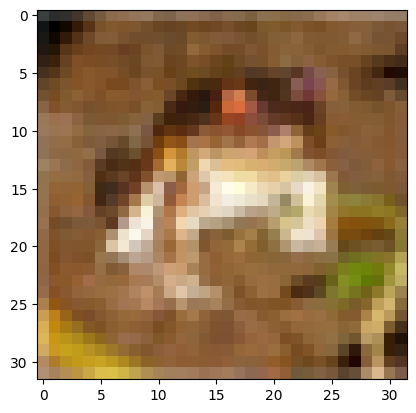

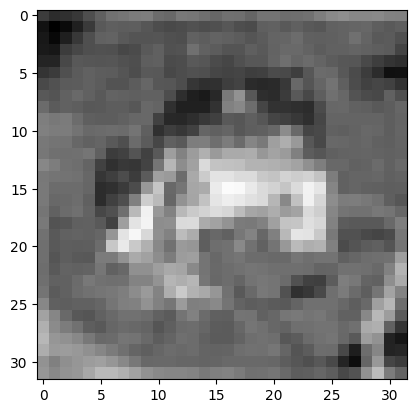

time: 282 ms (started: 2024-12-26 18:03:20 +05:30)


In [ ]:
# Converts the first image in the CIFAR-10 training set to grayscale and displays both the original and grayscale images
img = tf.image.rgb_to_grayscale(X_train[0])

plt.figure()
plt.imshow(X_train[0], vmin=0, vmax=255)  # Display original image
plt.show()

plt.figure()
plt.imshow(img, cmap="grey", vmin=0, vmax=255)  # Display grayscale image

## conversion to gray-level images


In [ ]:
# Concatenates the CIFAR-10 training and test datasets (images and labels)
# into single arrays and prints their shapes
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
print(X.shape, y.shape)

(60000, 32, 32, 3) (60000, 1)
time: 78 ms (started: 2024-12-26 18:03:20 +05:30)


In [ ]:
# Converts the entire CIFAR-10 dataset from RGB to grayscale and
# prints the shapes of the resulting grayscale images and labels
X_grey = tf.image.rgb_to_grayscale(X).numpy()
X_grey.shape, y.shape

((60000, 32, 32, 1), (60000, 1))

time: 750 ms (started: 2024-12-26 18:03:20 +05:30)


## Use randomly selected 70% of the dataset as training set and remaining 30% as the test set


In [ ]:
# Splits the grayscale CIFAR-10 dataset into training and
#  test sets (70% train, 30% test) and prints their shapes
X_train, X_test, y_train, y_test = train_test_split(
    X_grey, y, random_state=101, test_size=0.3, shuffle=True
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42000, 32, 32, 1), (42000, 1), (18000, 32, 32, 1), (18000, 1))

time: 46 ms (started: 2024-12-26 18:03:21 +05:30)


## Preprocessing


In [ ]:
# Standardize features
scaler = StandardScaler()

# Scales the pixel values of the training and test datasets by flattening them,
# applying scaling, and reshaping back to original dimensions
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(
    X_train.shape
)
X_test_scaled = scaler.fit_transform(X_test.reshape(X_test.shape[0], -1)).reshape(
    X_test.shape
)

X_train_scaled.shape, X_test_scaled.shape

((42000, 32, 32, 1), (18000, 32, 32, 1))

time: 1.16 s (started: 2024-12-26 18:03:21 +05:30)


In [ ]:
# Flattens the scaled training and test datasets into 2D arrays (samples, features) for model input
num_train_samples = X_train_scaled.shape[0]
X_train_flattened = X_train_scaled.reshape(num_train_samples, -1)
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

# Prints the number of training samples and the shapes of the flattened training and test datasets
num_train_samples, X_train_flattened.shape, X_test_flattened.shape

(42000, (42000, 1024), (18000, 1024))

time: 62 ms (started: 2024-12-26 18:03:22 +05:30)


# Task 1


## Perform standard PCA with 70% of the training dataset


In [ ]:
# Applies PCA to reduce the dimensionality of the flattened training and
# test datasets and prints their new shapes
pca_standard = PCA()
x_train_pca = pca_standard.fit_transform(X_train_flattened)
x_test_pca = pca_standard.transform(X_test_flattened)

x_train_pca.shape, x_test_pca.shape

((42000, 1024), (18000, 1024))

time: 11.3 s (started: 2024-12-26 18:03:23 +05:30)


In [ ]:
# Displays the number of principal components, the shape of the components matrix, and
# the shape of the explained variance from the PCA transformation
pca_standard.n_components_, pca_standard.components_.shape, pca_standard.explained_variance_.shape

(1024, (1024, 1024), (1024,))

time: 15 ms (started: 2024-12-26 18:03:34 +05:30)


## identify the eigenvectors associated with top eigenvalues with 95% total energy


In [ ]:
# Calculates the cumulative explained variance ratio from the PCA transformation and prints its size
cumulative_variance = np.cumsum(pca_standard.explained_variance_ratio_)
cumulative_variance.size

1024

time: 16 ms (started: 2024-12-26 18:03:34 +05:30)


In [ ]:
# Determines the number of principal components needed to explain at least 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
num_components

163

time: 0 ns (started: 2024-12-26 18:03:34 +05:30)


In [ ]:
# Reduces the training and test datasets to the selected number of principal
# components and prints their new shapes
X_train_pca_reduced = x_train_pca[:, :num_components]
X_test_pca_reduced = x_test_pca[:, :num_components]

X_train_pca_reduced.shape, X_test_pca_reduced.shape

((42000, 163), (18000, 163))

time: 63 ms (started: 2024-12-26 18:03:34 +05:30)


## train a logistic regression classifier to classify the images into 10 classes


In [ ]:
# Train Logistic Regression
task1_model1_logreg = LogisticRegression(max_iter=1000, random_state=101)
task1_model1_logreg.fit(X_train_pca_reduced, y_train)
y_pred_t1m1 = task1_model1_logreg.predict_proba(X_test_pca_reduced)

time: 5.28 s (started: 2024-12-26 18:03:34 +05:30)


In [ ]:
# Flattens the true and predicted labels, calculates accuracy
y_test_flat = y_test.flatten()
y_pred_t1m1_flat = np.argmax(y_pred_t1m1, axis=1).flatten()
print("accuracy:", accuracy_score(y_test_flat, y_pred_t1m1_flat))

accuracy: 0.3056111111111111
time: 16 ms (started: 2024-12-26 18:03:39 +05:30)


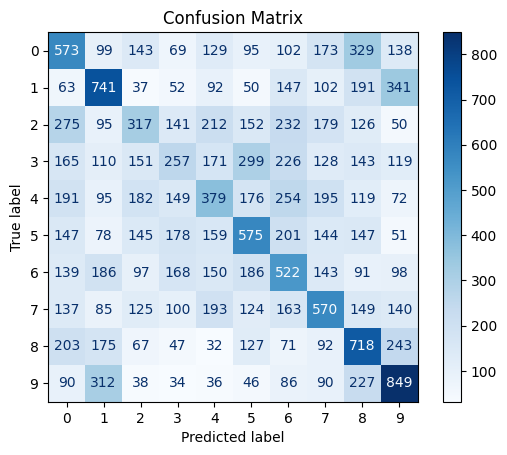

time: 797 ms (started: 2024-12-26 18:03:39 +05:30)


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_t1m1_flat)
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_display.plot(cmap=plt.cm.Blues)  # Choose a color map (e.g., Blues)
plt.title("Confusion Matrix")
plt.show()

## Draw the ROC curve for the test dataset


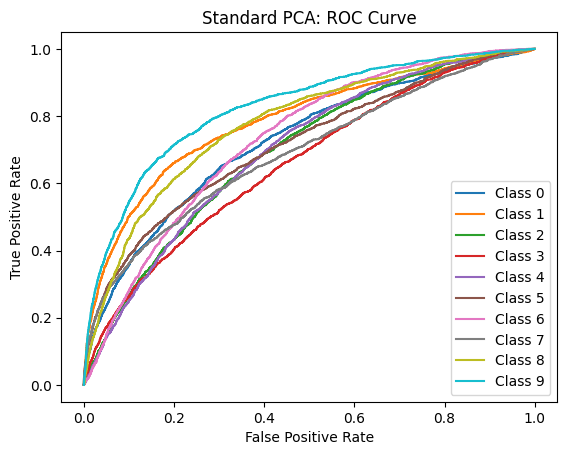

time: 484 ms (started: 2024-12-26 18:03:40 +05:30)


In [ ]:
# Compute ROC curve for each class
for i in range(10):  # Assuming 10 classes
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_t1m1[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.title("Standard PCA: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Repeat the same with randomized PCA


num_components_random: 163
(42000, 163) (18000, 163)
accuracy: 0.3065


<Figure size 640x480 with 0 Axes>

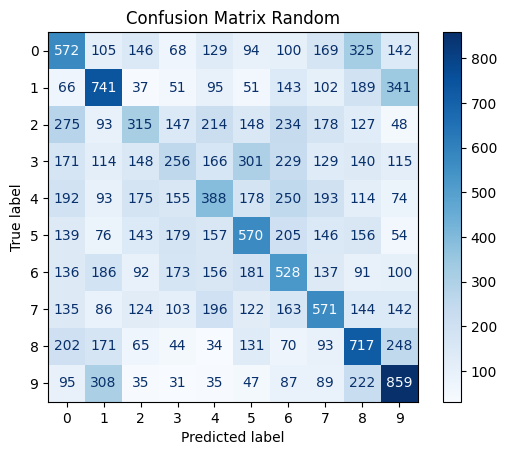

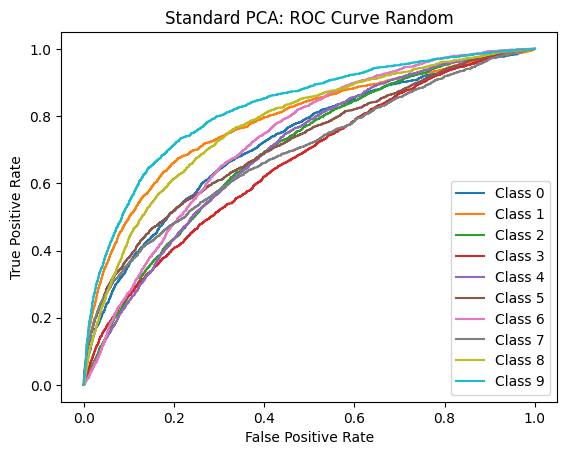

time: 10.7 s (started: 2024-12-26 18:03:41 +05:30)


In [ ]:
# Apply Randomized PCA
pca_randomized = TruncatedSVD(
    n_components=num_components,
    random_state=101,
)
X_train_pca_random = pca_randomized.fit_transform(X_train_flattened)
x_test_pca_random = pca_randomized.transform(X_test_flattened)

cumsum_random = np.cumsum(pca_randomized.explained_variance_ratio_)
num_components_random = np.argmax(cumsum_random >= 0.95) + 1
print("num_components_random:", num_components_random)

X_train_pca_reduced_random = X_train_pca_random[:, :num_components_random]
X_test_pca_reduced_random = x_test_pca_random[:, :num_components_random]

print(X_train_pca_reduced_random.shape, X_test_pca_reduced_random.shape)

# Train Logistic Regression
task1_model2 = LogisticRegression(max_iter=1000, random_state=101)
task1_model2.fit(X_train_pca_reduced_random, y_train)
y_pred_t1m2 = task1_model2.predict_proba(X_test_pca_reduced_random)

y_pred_t1m2_flat = np.argmax(y_pred_t1m2, axis=1).flatten()

print("accuracy:", accuracy_score(y_test_flat, y_pred_t1m2_flat))
conf_matrix = confusion_matrix(y_test_flat, y_pred_t1m2_flat)

# Display confusion matrix
plt.figure()
disp_random = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_random.plot(cmap=plt.cm.Blues)  # Choose a color map (e.g., Blues)
plt.title("Confusion Matrix Random")
plt.show()

# Compute ROC curve for each class
plt.figure()
for i in range(10):  # Assuming 10 classes
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_t1m2[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.title("Standard PCA: ROC Curve Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Compare Standard PCA & Randomized PCA


In [ ]:
# Calculates and prints the AUC for each class using both the standard and randomized PCA-based predictions
for i in range(10):
    auc_standard = roc_auc_score(y_test == i, y_pred_t1m1[:, i])
    auc_randomized = roc_auc_score(y_test == i, y_pred_t1m2[:, i])
    print(f"Class {i}: AUC (Standard PCA) = {auc_standard:.3f}, AUC (Randomized PCA) = {auc_randomized:.3f}")

Class 0: AUC (Standard PCA) = 0.725, AUC (Randomized PCA) = 0.725
Class 1: AUC (Standard PCA) = 0.784, AUC (Randomized PCA) = 0.784
Class 2: AUC (Standard PCA) = 0.695, AUC (Randomized PCA) = 0.696
Class 3: AUC (Standard PCA) = 0.660, AUC (Randomized PCA) = 0.661
Class 4: AUC (Standard PCA) = 0.698, AUC (Randomized PCA) = 0.697
Class 5: AUC (Standard PCA) = 0.715, AUC (Randomized PCA) = 0.715
Class 6: AUC (Standard PCA) = 0.731, AUC (Randomized PCA) = 0.730
Class 7: AUC (Standard PCA) = 0.691, AUC (Randomized PCA) = 0.691
Class 8: AUC (Standard PCA) = 0.776, AUC (Randomized PCA) = 0.776
Class 9: AUC (Standard PCA) = 0.825, AUC (Randomized PCA) = 0.825
time: 141 ms (started: 2024-12-26 18:03:51 +05:30)


# Task2


## Train a single layer autoencoder with linear activation function and appropriately mean and variance normalized input with constraint that encoder weight matrix and decoder weight matrix are transpose w,r,t, each other.


In [ ]:
# Custom constraint to tie encoder and decoder weights
class TransposeConstraint(Constraint):
    def __init__(self, encoder_layer):
        self.encoder_layer = encoder_layer

    def __call__(self, w):
        return tf.transpose(self.encoder_layer.kernel)

time: 16 ms (started: 2024-12-26 18:03:51 +05:30)


In [ ]:
# Define input dimensions
input_dim = X_train_flattened.shape[1]
latent_dim = num_components  # From PCA, 95% variance

time: 15 ms (started: 2024-12-26 18:03:51 +05:30)


In [ ]:
# Build the autoencoder
class LinearAutoencoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(LinearAutoencoder, self).__init__()
        self.encoder = tf.keras.layers.Dense(
            latent_dim, activation="linear", use_bias=False
        )
        self.decoder = tf.keras.layers.Dense(
            input_dim,
            activation="linear",
            use_bias=False,
            kernel_constraint=TransposeConstraint(self.encoder),
        )

    def call(self, inputs):
        latent = self.encoder(inputs)
        reconstructed = self.decoder(latent)
        # return latent, reconstructed
        return reconstructed

time: 16 ms (started: 2024-12-26 18:03:51 +05:30)


In [ ]:
# Initialize the model
linearautoencoder = LinearAutoencoder(input_dim=input_dim, latent_dim=latent_dim)
linearautoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss="mse")

# Prepare input tensors
X_train_tensor = tf.convert_to_tensor(X_train_flattened, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_flattened, dtype=tf.float32)

# Train the autoencoder
linearautoencoder.fit(
    X_train_tensor,
    X_train_tensor,
    epochs=20,
    batch_size=32,
    verbose=2,
)

Epoch 1/20
1313/1313 - 4s - 3ms/step - loss: 0.7798
Epoch 2/20
1313/1313 - 4s - 3ms/step - loss: 0.7759
Epoch 3/20
1313/1313 - 3s - 3ms/step - loss: 0.7768
Epoch 4/20
1313/1313 - 4s - 3ms/step - loss: 0.8172
Epoch 5/20
1313/1313 - 3s - 3ms/step - loss: 0.8629
Epoch 6/20
1313/1313 - 4s - 3ms/step - loss: 0.8830
Epoch 7/20
1313/1313 - 3s - 3ms/step - loss: 0.8826
Epoch 8/20
1313/1313 - 3s - 3ms/step - loss: 0.8824
Epoch 9/20
1313/1313 - 3s - 3ms/step - loss: 0.8824
Epoch 10/20
1313/1313 - 4s - 3ms/step - loss: 0.8835
Epoch 11/20
1313/1313 - 4s - 3ms/step - loss: 0.8995
Epoch 12/20
1313/1313 - 4s - 3ms/step - loss: 0.8940
Epoch 13/20
1313/1313 - 3s - 3ms/step - loss: 0.8940
Epoch 14/20
1313/1313 - 3s - 3ms/step - loss: 0.8940
Epoch 15/20
1313/1313 - 4s - 3ms/step - loss: 0.8940
Epoch 16/20
1313/1313 - 4s - 3ms/step - loss: 0.8940
Epoch 17/20
1313/1313 - 4s - 3ms/step - loss: 0.9028
Epoch 18/20
1313/1313 - 4s - 3ms/step - loss: 0.8915
Epoch 19/20
1313/1313 - 4s - 3ms/step - loss: 0.8902
Ep

time: 1min 12s (started: 2024-12-26 18:03:51 +05:30)


In [ ]:
# Retrieves the weights of the encoder part of the autoencoder
# and prints the shape of the resulting array
np.array(linearautoencoder.encoder.get_weights()).shape

(1, 1024, 163)

time: 16 ms (started: 2024-12-26 18:05:04 +05:30)


In [ ]:
# Extract eigenvectors (encoder weights)
autoencoder_eigenvectors = linearautoencoder.encoder.get_weights()[0]
print("Autoencoder Eigenvectors Shape:", autoencoder_eigenvectors.shape)

# Compare with PCA eigenvectors
pca_eigenvectors_reduced = pca_standard.components_[
    :num_components
]  # From PCA in step 1

Autoencoder Eigenvectors Shape: (1024, 163)
time: 0 ns (started: 2024-12-26 18:05:04 +05:30)


## Compare the eigenvectors obtained in step 1 with those obtained using the autoencoders

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity
similarity_matrix = cosine_similarity(
    autoencoder_eigenvectors.T,
    pca_eigenvectors_reduced,
)
print("Cosine Similarity Matrix:")
print(similarity_matrix.shape)
print(similarity_matrix)

Cosine Similarity Matrix:
(163, 163)
[[ 0.03468711  0.05014458  0.00797207 ... -0.00198312  0.00418581
  -0.0381428 ]
 [ 0.02212608  0.00880264 -0.00992425 ... -0.00489356  0.01847659
  -0.01135071]
 [ 0.0156862   0.01122223 -0.03216827 ...  0.00379267 -0.00037169
   0.02557414]
 ...
 [ 0.03123378 -0.01112724  0.03079378 ...  0.0165072  -0.01714268
  -0.00558407]
 [-0.0281614  -0.0095117   0.01302351 ... -0.04891503 -0.03158771
   0.00436203]
 [-0.01488403 -0.01023261  0.0165287  ... -0.03106227 -0.06661311
  -0.01924354]]
time: 0 ns (started: 2024-12-26 18:05:04 +05:30)


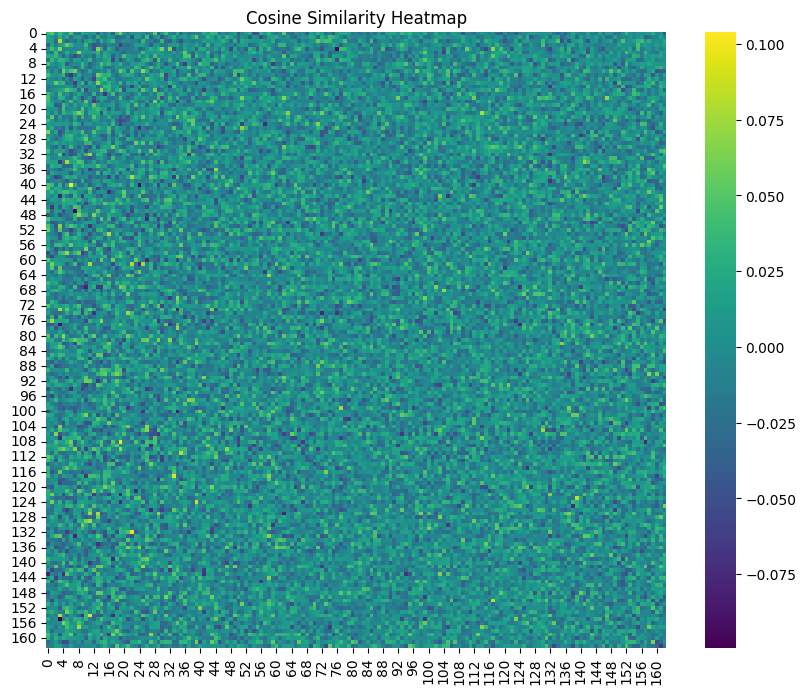

time: 750 ms (started: 2024-12-26 18:05:04 +05:30)


In [ ]:
# Generate a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better visibility
sns.heatmap(similarity_matrix, cmap="viridis", cbar=True)
plt.title("Cosine Similarity Heatmap")
plt.show()

## Explain your observations

Task1:
- Standard PCA and Randomized PCA are interchangeable for high-dimensional datasets, with Randomized PCA being faster
- Randomized PCA is often a good approximation of Standard PCA, trading off minimal accuracy for significant computational efficiency.

Task2:
- PCA and constrained autoencoders yield similar results in identifying important features. However, PCA provides a stricter mathematical guarantee of orthogonality and variance ordering. Autoencoders, with their flexibility, offer potential extensions to nonlinear problems
- Autoencoders can be viewed as a generalization of PCA, capable of capturing nonlinear patterns when deeper or nonlinear layers are added. However, in the linear case, they closely approximate PCA.

# Task 3


## Train an appropriate deep convolutional autoencoder with same dimension of latent space. Calculate the reconstruction error and compare that with a single hidden layer autoencoder (with sigmoid activation at the autoencoder and linear at the decoder) for the test dataset.

In [ ]:
# Helper function to plot reconstructed images
def plot_reconstructed(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].squeeze(), cmap="gray")
        plt.title("Original")
        plt.axis("off")

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].squeeze(), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")

    plt.show()

time: 0 ns (started: 2024-12-26 18:05:05 +05:30)


In [ ]:
class SingleLayerAutoencoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(SingleLayerAutoencoder, self).__init__()
        self.encoder = tf.keras.layers.Dense(latent_dim, activation="sigmoid")
        self.decoder = tf.keras.layers.Dense(input_dim, activation="linear")

    def call(self, inputs):
        latent = self.encoder(inputs)
        reconstructed = self.decoder(latent)
        # return latent, reconstructed
        return reconstructed

time: 0 ns (started: 2024-12-26 18:05:05 +05:30)


In [ ]:
# Initialize the model
single_layer_autoencoder = SingleLayerAutoencoder(input_dim=input_dim, latent_dim=latent_dim)
single_layer_autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss="mse")

# Train the autoencoder
single_layer_autoencoder.fit(
    X_train_tensor,
    X_train_tensor,
    epochs=20,
    batch_size=128,
    verbose=2,
    validation_data=(X_test_tensor, X_test_tensor),
)

Epoch 1/20
329/329 - 3s - 8ms/step - loss: 0.3483 - val_loss: 0.2179
Epoch 2/20
329/329 - 2s - 5ms/step - loss: 0.1814 - val_loss: 0.1587
Epoch 3/20
329/329 - 2s - 5ms/step - loss: 0.1409 - val_loss: 0.1306
Epoch 4/20
329/329 - 2s - 5ms/step - loss: 0.1192 - val_loss: 0.1167
Epoch 5/20
329/329 - 2s - 5ms/step - loss: 0.1055 - val_loss: 0.1019
Epoch 6/20
329/329 - 2s - 5ms/step - loss: 0.0963 - val_loss: 0.0940
Epoch 7/20
329/329 - 2s - 5ms/step - loss: 0.0884 - val_loss: 0.0878
Epoch 8/20
329/329 - 2s - 6ms/step - loss: 0.0835 - val_loss: 0.0826
Epoch 9/20
329/329 - 2s - 5ms/step - loss: 0.0796 - val_loss: 0.0788
Epoch 10/20
329/329 - 2s - 5ms/step - loss: 0.0761 - val_loss: 0.0816
Epoch 11/20
329/329 - 2s - 5ms/step - loss: 0.0736 - val_loss: 0.0764
Epoch 12/20
329/329 - 2s - 5ms/step - loss: 0.0729 - val_loss: 0.0731
Epoch 13/20
329/329 - 2s - 5ms/step - loss: 0.0701 - val_loss: 0.0710
Epoch 14/20
329/329 - 2s - 5ms/step - loss: 0.0690 - val_loss: 0.0700
Epoch 15/20
329/329 - 2s - 5m

time: 36.1 s (started: 2024-12-26 18:05:05 +05:30)


In [ ]:
# Evaluate and reconstruct images
single_reconstructed = single_layer_autoencoder.predict(X_test_tensor)
single_error = np.mean((X_test_tensor - single_reconstructed) ** 2)
print(f"Reconstruction Error (Single Hidden Layer): {single_error}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reconstruction Error (Single Hidden Layer): 0.06506482511758804
time: 1.34 s (started: 2024-12-26 18:05:41 +05:30)


## What will be the reconstruction error if the hidden nodes are distributed equally (approximately) among 3 hidden layers in a new 3 hidden layer autoencoder with sigmoid activation at the autoencoder and linear at the decoder final layer?

In [ ]:
X_train_org_tensor = tf.convert_to_tensor(X_train_scaled)
X_test_org_tensor = tf.convert_to_tensor(X_test_scaled)

time: 156 ms (started: 2024-12-26 18:05:43 +05:30)


In [ ]:
class DeepAutoencoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(DeepAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential()
        self.encoder.add(tf.keras.layers.Input(shape=input_dim))  # 32x32x1
        self.encoder.add(
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")
        )
        self.encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding="same"))
        self.encoder.add(
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")
        )
        self.encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding="same"))
        self.encoder.add(tf.keras.layers.Flatten())
        self.encoder.add(tf.keras.layers.Dense(latent_dim, activation="relu"))
        # list(X_train_org_tensor.shape[1:])

        # Decoder
        self.decoder = tf.keras.Sequential()
        self.decoder.add(tf.keras.layers.Dense(8 * 8 * 64, activation="relu"))
        self.decoder.add(tf.keras.layers.Reshape((8, 8, 64)))
        self.decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
        self.decoder.add(
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")
        )
        self.decoder.add(tf.keras.layers.UpSampling2D((2, 2)))
        self.decoder.add(
            tf.keras.layers.Conv2D(1, (3, 3), activation="linear", padding="same")
        )

    def call(self, inputs):
        latent = self.encoder(inputs)
        reconstructed = self.decoder(latent)
        # return latent, reconstructed
        return reconstructed

time: 0 ns (started: 2024-12-26 18:05:43 +05:30)


In [ ]:
conv_autoencoder = DeepAutoencoder(
    input_dim=list(X_train_org_tensor.shape[1:]), latent_dim=latent_dim
)
conv_autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
conv_autoencoder.fit(
    X_train_org_tensor,
    X_train_org_tensor,
    epochs=20,
    batch_size=128,
    validation_data=(X_test_org_tensor, X_test_org_tensor),
)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 31s 86ms/step - loss: 0.4028 - val_loss: 0.1693
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - loss: 0.1549 - val_loss: 0.1335
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - loss: 0.1257 - val_loss: 0.1163
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 32s 96ms/step - loss: 0.1145 - val_loss: 0.1090
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - loss: 0.1070 - val_loss: 0.1021
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - loss: 0.1014 - val_loss: 0.0988
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - loss: 0.0968 - val_loss: 0.0964
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - loss: 0.0927 - val_loss: 0.0904
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - loss: 0.0894 - val_loss: 0.0896
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - loss: 0.0879 - val_loss: 0.0884
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - loss: 0.0863 - val_loss: 0.0847
Epoch 12/20
329/329 ━━━━━━━━━

time: 9min 54s (started: 2024-12-26 18:05:43 +05:30)


In [ ]:
# Evaluate and reconstruct images
conv_reconstructed = conv_autoencoder.predict(X_test_org_tensor)
conv_error = np.mean((X_test_org_tensor.numpy() - conv_reconstructed) ** 2)
print(f"Reconstruction Error (Convolutional Autoencoder): {conv_error}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Reconstruction Error (Convolutional Autoencoder): 0.0787442856132145
time: 5.59 s (started: 2024-12-26 18:15:38 +05:30)


In [ ]:
class MLPRoAutoencoder(Model):
    # Step 4: Three Hidden Layer Autoencoder
    # Build the autoencoder
    def __init__(self, input_dim, latent_dim):
        super(MLPRoAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential()
        self.encoder.add(tf.keras.layers.Dense(256, activation="sigmoid"))
        self.encoder.add(tf.keras.layers.Dense(128, activation="sigmoid"))
        self.encoder.add(tf.keras.layers.Dense(64, activation="sigmoid"))
        self.encoder.add(tf.keras.layers.Dense(32, activation="sigmoid"))
        # list(X_train_org_tensor.shape[1:])

        # Decoder
        self.decoder = tf.keras.Sequential()
        self.decoder.add(tf.keras.layers.Dense(64, activation="sigmoid"))
        self.decoder.add(tf.keras.layers.Dense(128, activation="sigmoid"))
        self.decoder.add(tf.keras.layers.Dense(256, activation="sigmoid"))
        self.decoder.add(tf.keras.layers.Dense(input_dim, activation="linear"))

    def call(self, inputs):
        latent = self.encoder(inputs)
        reconstructed = self.decoder(latent)
        # return latent, reconstructed
        return reconstructed


multi_layer_autoencoder = MLPRoAutoencoder(input_dim=input_dim, latent_dim=latent_dim)
multi_layer_autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
multi_layer_autoencoder.fit(
    X_train_tensor,
    X_train_tensor,
    epochs=20,
    batch_size=128,
    validation_data=(X_test_tensor, X_test_tensor),
)

# Evaluate and reconstruct images
multi_reconstructed = multi_layer_autoencoder.predict(X_test_tensor)
multi_error = np.mean((X_test_tensor - multi_reconstructed) ** 2)
print(f"Reconstruction Error (Three Hidden Layer Autoencoder): {multi_error}")

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.9821 - val_loss: 0.7219
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7208 - val_loss: 0.7144
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7183 - val_loss: 0.7087
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7128 - val_loss: 0.7039
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7065 - val_loss: 0.6795
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6824 - val_loss: 0.6659
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6728 - val_loss: 0.6659
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6661 - val_loss: 0.6593
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6614 - val_loss: 0.6553
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6563 - val_loss: 0.6485
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6509 - val_loss: 0.6480
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

In [ ]:
# Step 5: Comparison of Reconstruction Errors
print(
    f"""
Reconstruction Errors:
- Single Hidden Layer Autoencoder: {single_error:.4f}
- Deep Convolutional Autoencoder: {conv_error:.4f}
- Three Hidden Layer Autoencoder: {multi_error:.4f}
"""
)


Reconstruction Errors:
- Single Hidden Layer Autoencoder: 0.0651
- Deep Convolutional Autoencoder: 0.0787
- Three Hidden Layer Autoencoder: 0.5653

time: 0 ns (started: 2024-12-26 18:16:42 +05:30)


# Conclusions of the reconstruction errors

## 1. Single Hidden Layer Autoencoder
- A single hidden layer autoencoder with linear activation at the decoder is limited in its capacity to capture complex patterns in high-dimensional data like CIFAR-10 grayscale images
- The relatively low error indicates that the model can handle basic variance but struggles with intricate image details

## 2. Deep Convolutional Autoencoder
- Convolutional autoencoders are better suited for image data because they exploit spatial hierarchies. However, the reconstruction error might still be high due to:
 - Latent Space Dimension: If the latent space dimension is too small, it limits the model's ability to represent all critical features of the data.

 - Optimization Challenges: Convolutional models may require more epochs, careful weight initialization, or different learning rates to converge effectively.
  - Training Set Size: Using only 70% of CIFAR-10 for training might not provide enough data for the convolutional autoencoder to generalize well.

## 3. Three Hidden Layer Autoencoder
 - The drastic increase in reconstruction error suggests issues related to architecture and training:
  - Ineffective Feature Compression: Distributing hidden nodes equally among three layers can dilute the representation capacity, as each layer is constrained by fewer neurons.
  - Vanishing Gradients: Sigmoid activations can lead to vanishing gradients, especially in deeper networks, making training inefficient and causing poor convergence.
  - Underfitting: The network might not have enough capacity in any single layer to effectively reconstruct the input, resulting in high reconstruction errors. Unoptimized Training: Poor hyperparameter tuning (e.g., learning rate, batch size) or insufficient training epochs can exacerbate these issues.



In [ ]:
X_train_tensor.numpy().shape, single_reconstructed.shape

((42000, 1024), (18000, 1024))

time: 94 ms (started: 2024-12-26 18:16:42 +05:30)


In [ ]:
single_reconstructed

array([[ 0.2931452 ,  0.2302254 ,  0.22263876, ...,  0.2286514 ,
         0.24217537,  0.20233601],
       [ 1.5507051 ,  1.6596694 ,  1.7081412 , ..., -0.44900405,
        -0.44847125, -0.46462655],
       [-0.9782436 , -1.1050595 , -1.2236279 , ..., -0.7011511 ,
        -0.56493896, -0.4510011 ],
       ...,
       [ 0.43880725,  0.38300505,  0.32264197, ...,  0.1098944 ,
         0.21472938,  0.23838896],
       [-0.06216872, -0.07778095, -0.05377567, ..., -0.45230988,
        -0.51140463, -0.5848164 ],
       [ 0.6107887 ,  0.61431056,  0.6653707 , ...,  0.55849606,
         0.5508666 ,  0.52318805]], dtype=float32)

time: 16 ms (started: 2024-12-26 18:16:42 +05:30)


(18000, 32, 32, 1)
Single Hidden Layer Autoencoder Reconstruction:


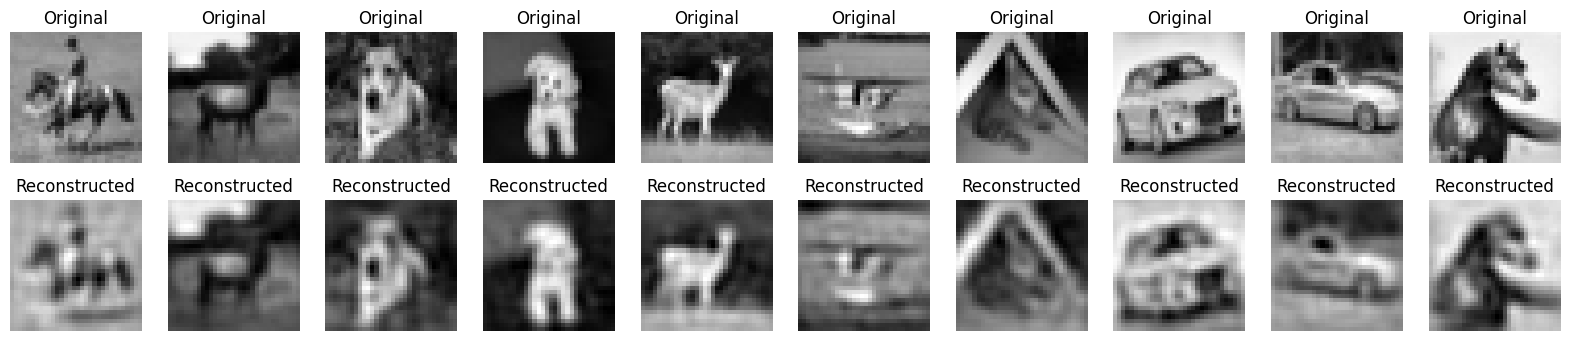

Deep Convolutional Autoencoder Reconstruction:


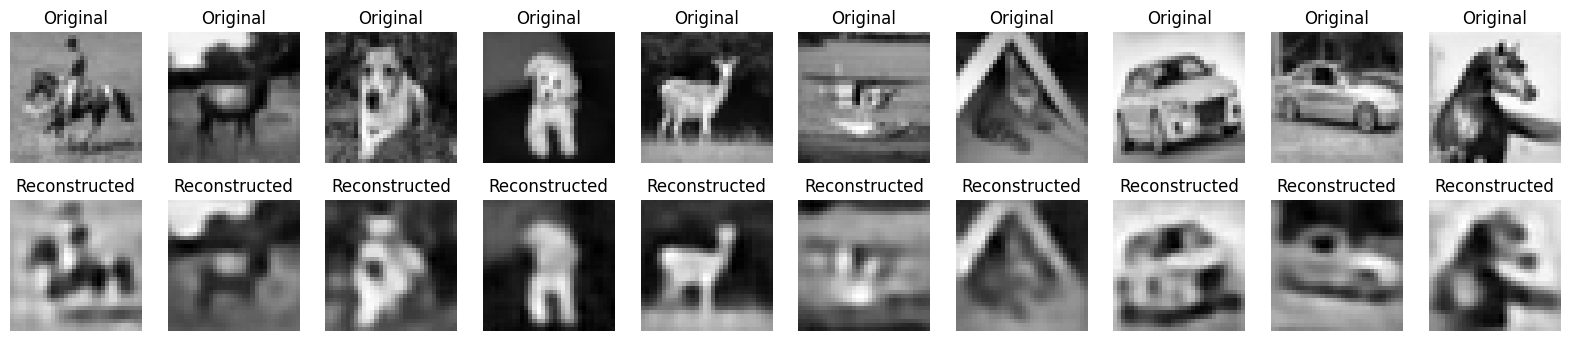

Three Hidden Layer Autoencoder Reconstruction:


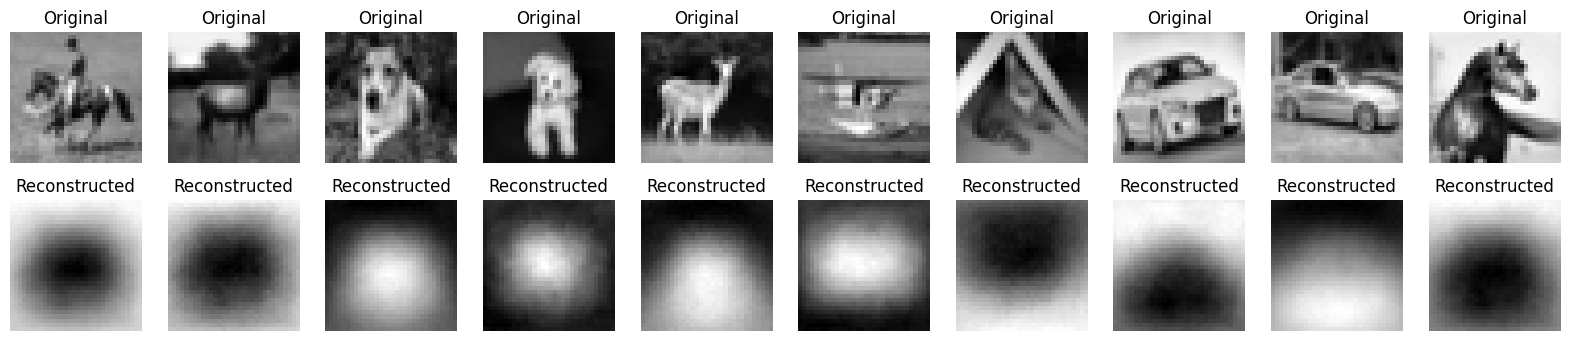

time: 2.91 s (started: 2024-12-26 18:16:42 +05:30)


In [ ]:
# Step 6: Visualization
# Visualize reconstructions from each model
org_shape = X_test.shape
print(org_shape)

print("Single Hidden Layer Autoencoder Reconstruction:")
plot_reconstructed(
    X_test_org_tensor.numpy(),
    single_reconstructed.reshape(org_shape),
)

print("Deep Convolutional Autoencoder Reconstruction:")
plot_reconstructed(X_test_org_tensor.numpy(), conv_reconstructed.reshape(org_shape))

print("Three Hidden Layer Autoencoder Reconstruction:")
plot_reconstructed(X_test_org_tensor.numpy(), multi_reconstructed.reshape(org_shape))